In [1]:
# The import statements
import math
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Constants for configuration
DB_PATH = './simulation-series/high-mod-series.db'
DB_PATH_ADV_SERIES = './simulation-series/community-gossip.db'
TABLE_SUMMARIES = 'SUMMARIES'
TABLE_AVERAGED_RESULTS = 'AVERAGED_RESULTS'

In [3]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Query to retrieve the data from the database
query = f"SELECT * FROM {TABLE_SUMMARIES}"

# Read the data into a pandas DataFrame
dataframe = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
dataframe.head()

,timestamp,algorithm,assortativity,averageAuthorityScore,averageBetweennessCentrality,averageClosenessCentrality,averageCommunitySize,averageDegreeCentrality,averageEccentricity,averageEigenvectorCentrality,...,stdevNeighborsDegree,stdevNodeDegree,stdevPageRank,stdevRichClubCoefficient,transitivity,triangleProbability,graphType,objectStoragePath,numRounds,factor
0,2023-08-09-14-22-24,community_probabilities,-0.1272,0.001,0.0062,0.1449,31.2500,0.002,14.309,0.0093,...,10.7370,288.8194,0.0013,0.2997,0.0000,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,19.0,NaN
1,2023-08-09-14-16-01,community_probabilities,-0.1104,0.001,0.0061,0.1460,27.7778,0.002,11.752,0.0095,...,8.4989,288.8194,0.0012,0.2452,0.0006,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,20.0,NaN
2,2023-08-09-14-40-37,community_probabilities,-0.0967,0.001,0.0053,0.1659,32.2581,0.002,12.103,0.0099,...,15.1625,288.8194,0.0015,0.3345,0.0057,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,34.0,NaN
3,2023-08-09-14-31-55,community_probabilities,-0.1296,0.001,0.0060,0.1489,30.3030,0.002,12.477,0.0096,...,12.5728,288.8194,0.0014,0.4092,0.0060,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,38.0,NaN
4,2023-08-09-14-57-51,community_probabilities,-0.1300,0.001,0.0056,0.1564,27.7778,0.002,11.626,0.0116,...,11.8887,288.8194,0.0014,0.2470,0.0023,0.3861,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,21.0,NaN


In [4]:
# Establish a connection to the additional SQLite database
conn_adv = sqlite3.connect(DB_PATH_ADV_SERIES)

# Query to retrieve the data from the additional database
query_adv = f"SELECT * FROM {TABLE_SUMMARIES}"

# Read the data from the additional database into a pandas DataFrame
dataframe_adv = pd.read_sql_query(query_adv, conn_adv)

# Close the additional database connection
conn_adv.close()

# Concatenate or merge the dataframes vertically
dataframe = pd.concat([dataframe, dataframe_adv], ignore_index=True)

# Display the first few rows of the combined DataFrame
dataframe.head()

,timestamp,algorithm,assortativity,averageAuthorityScore,averageBetweennessCentrality,averageClosenessCentrality,averageCommunitySize,averageDegreeCentrality,averageEccentricity,averageEigenvectorCentrality,...,stdevNeighborsDegree,stdevNodeDegree,stdevPageRank,stdevRichClubCoefficient,transitivity,triangleProbability,graphType,objectStoragePath,numRounds,factor
0,2023-08-09-14-22-24,community_probabilities,-0.1272,0.001,0.0062,0.1449,31.2500,0.002,14.309,0.0093,...,10.7370,288.8194,0.0013,0.2997,0.0000,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,19.0,NaN
1,2023-08-09-14-16-01,community_probabilities,-0.1104,0.001,0.0061,0.1460,27.7778,0.002,11.752,0.0095,...,8.4989,288.8194,0.0012,0.2452,0.0006,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,20.0,NaN
2,2023-08-09-14-40-37,community_probabilities,-0.0967,0.001,0.0053,0.1659,32.2581,0.002,12.103,0.0099,...,15.1625,288.8194,0.0015,0.3345,0.0057,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,34.0,NaN
3,2023-08-09-14-31-55,community_probabilities,-0.1296,0.001,0.0060,0.1489,30.3030,0.002,12.477,0.0096,...,12.5728,288.8194,0.0014,0.4092,0.0060,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,38.0,NaN
4,2023-08-09-14-57-51,community_probabilities,-0.1300,0.001,0.0056,0.1564,27.7778,0.002,11.626,0.0116,...,11.8887,288.8194,0.0014,0.2470,0.0023,0.3861,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,21.0,NaN


In [5]:
# Group the DataFrame by 'algorithm' and 'factor'
group_by_alg = dataframe.groupby('algorithm')

# Create a dictionary to store the smaller DataFrames
alg_df = {}

# Iterate over the groups and store them in the dictionary
for algorithm, group_df in group_by_alg:
    alg_df[algorithm] = group_df

alg_df.keys()

dict_keys(['community_based', 'community_probabilities', 'default', 'weighted_factor'])

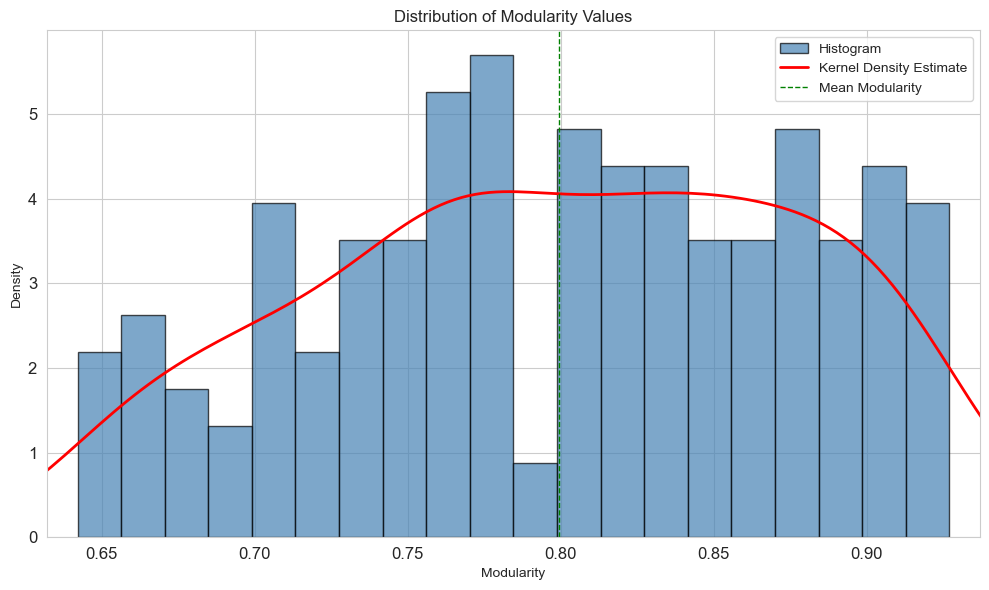

In [6]:
# Extract the modularity values for the 'default' algorithm
modularity_values_default = alg_df['default']['modularity']

# Set the style using Seaborn
sns.set_style('whitegrid')

# Create a histogram plot
plt.figure(figsize=(10, 6))

# Customize the histogram appearance
plt.hist(modularity_values_default, bins=20, color='steelblue', alpha=0.7, edgecolor='black', density=True, label='Histogram')

# Overlay a kernel density estimate (curve)
sns.kdeplot(modularity_values_default, color='red', linewidth=2, label='Kernel Density Estimate')

plt.xlabel('Modularity')
plt.ylabel('Density')
plt.title('Distribution of Modularity Values')

# Calculate and display the mean
mean_modularity = modularity_values_default.mean()
plt.axvline(x=mean_modularity, color='green', linestyle='dashed', linewidth=1, label='Mean Modularity')

# Set x-axis limits to avoid extending beyond the data
plt.xlim(modularity_values_default.min()-0.01, modularity_values_default.max()+0.01)

# Add legend
plt.legend()

# Customize tick labels and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

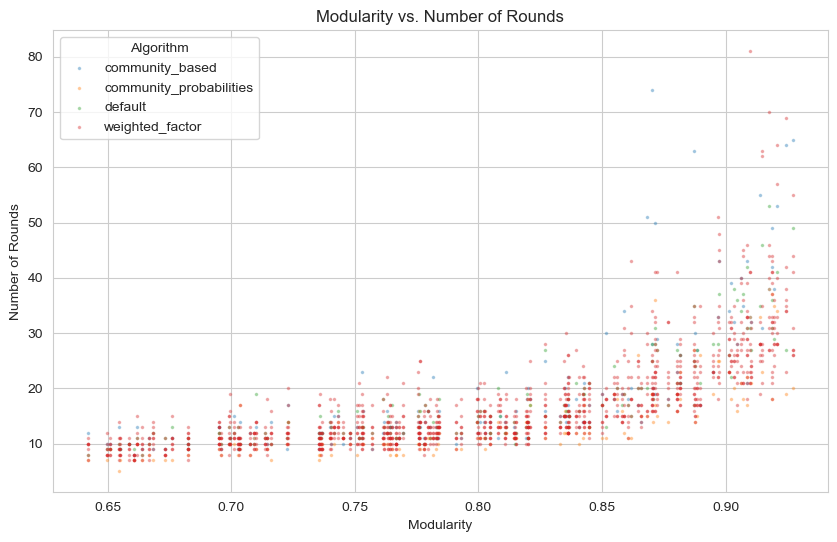

In [7]:
# Create a pretty plot using matplotlib
plt.figure(figsize=(10, 6))

for alg, df in alg_df.items():
    plt.scatter(df['modularity'], df['numRounds'], label=alg, alpha=0.3, marker='.', s=10)

plt.xlabel('Modularity')
plt.ylabel('Number of Rounds')
plt.title('Modularity vs. Number of Rounds')
plt.legend(title='Algorithm')

# Show the plot
plt.show()

In [10]:
# Group the DataFrame by 'factor'
group_by_factor = dataframe.groupby('factor')

# Create dictionaries to store the smaller DataFrames
grouped_df = {}
grouped_df_adv = {}  # New dictionary for advanced algorithms

# Iterate over the groups and store them in the dictionaries
for factor, group_df in group_by_factor:
    factor_key = f'{factor}'
    grouped_df[factor_key] = group_df
    print(f'Dataframe for weighted with factor {factor_key} has {len(group_df)} entries')

# Filter and store data for community_probabilities algorithm
df_community_probabilities = dataframe[dataframe['algorithm'] == 'community_probabilities']
print(f'Dataframe for community_probabilities has {len(df_community_probabilities)} entries')

# Filter and store data for default algorithm
df_default = dataframe[dataframe['algorithm'] == 'default']
print(f'Dataframe for default has {len(df_default)} entries')


# Filter and store data for community_probabilities algorithm
df_community_gossip = dataframe[dataframe['algorithm'] == 'community_based']
print(f'Dataframe for community_gossip has {len(df_community_gossip)} entries')

Dataframe for weighted with factor 1.25 has 160 entries
Dataframe for weighted with factor 1.5 has 160 entries
Dataframe for weighted with factor 1.75 has 160 entries
Dataframe for weighted with factor 2.0 has 160 entries
Dataframe for weighted with factor 2.25 has 160 entries
Dataframe for weighted with factor 2.5 has 160 entries
Dataframe for weighted with factor 2.75 has 160 entries
Dataframe for weighted with factor 3.0 has 160 entries
Dataframe for community_probabilities has 160 entries
Dataframe for default has 160 entries
Dataframe for community_gossip has 160 entries


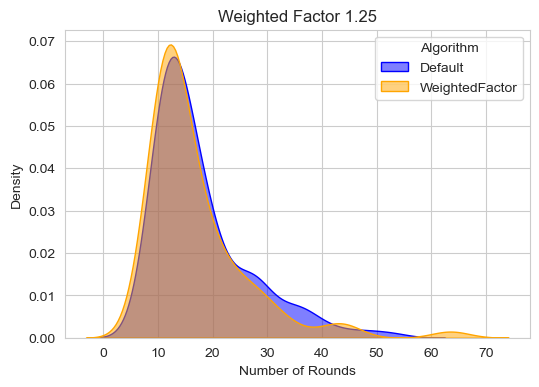

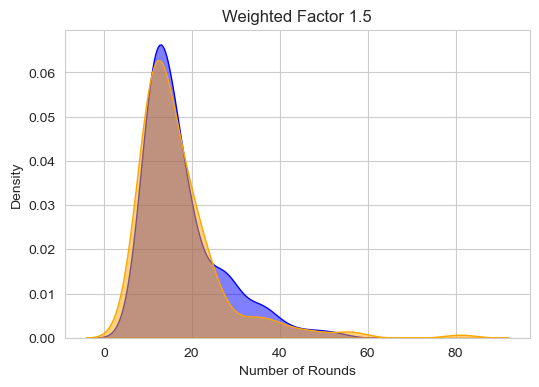

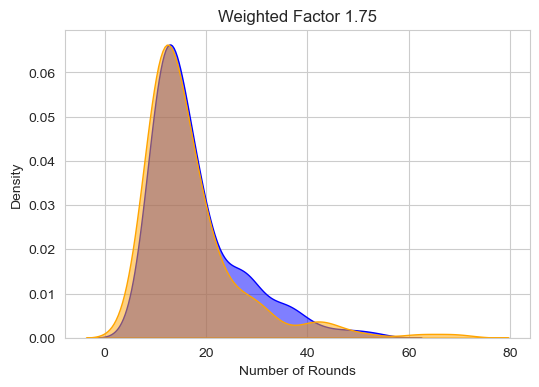

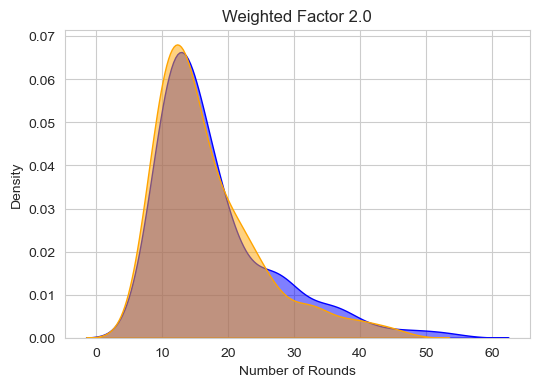

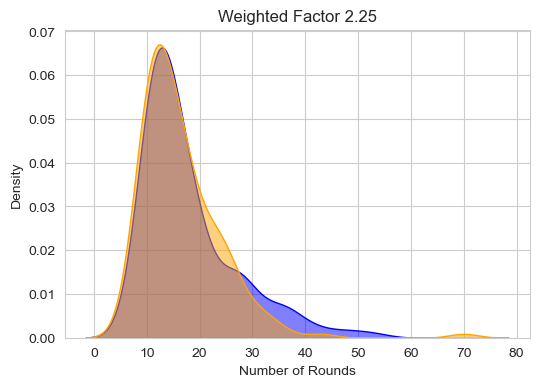

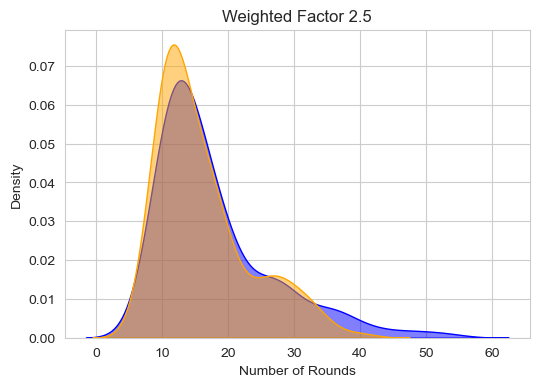

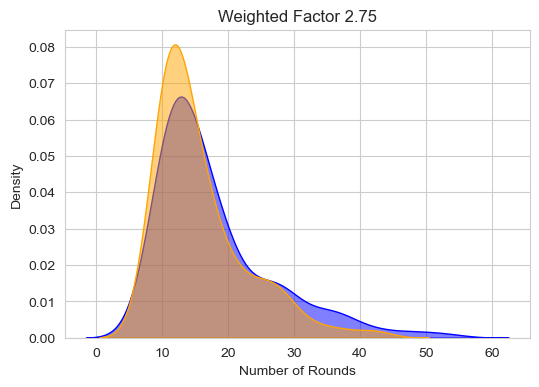

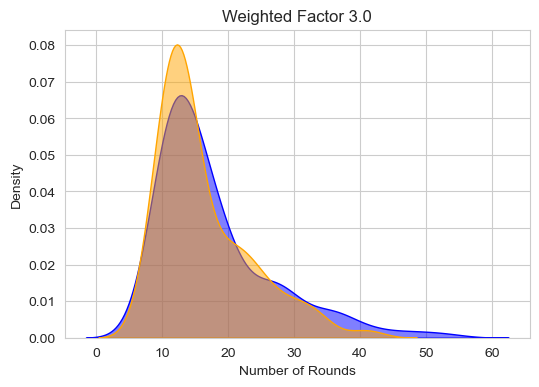

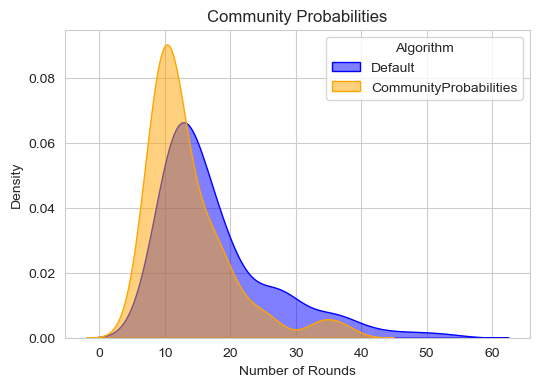

In [11]:
# Sort the grouped DataFrame keys
sorted_keys = sorted(grouped_df.keys())

# Iterate over the sorted grouped keys and create separate plots
for idx, group_key in enumerate(sorted_keys):
    # Get the DataFrame for the current key
    group_df = grouped_df[group_key]

    # Create a new plot for each rounded modularity combination
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df_default, x='numRounds', label='Default', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(data=group_df, x='numRounds', label='WeightedFactor', color='orange', fill=True, alpha=0.5)

    plt.xlabel('Number of Rounds')
    plt.ylabel('Density')
    plt.title(f'Weighted Factor {group_key}')
    if idx == 0:
        plt.legend(title='Algorithm')

    # Show the plot
    plt.show()

# Create a new plot for each rounded modularity combination
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_default, x='numRounds', label='Default', color='blue', fill=True, alpha=0.5)
sns.kdeplot(data=df_community_probabilities, x='numRounds', label='CommunityProbabilities', color='orange', fill=True, alpha=0.5)

plt.xlabel('Number of Rounds')
plt.ylabel('Density')
plt.title(f'Community Probabilities')
plt.legend(title='Algorithm')

# Show the plot
plt.show()

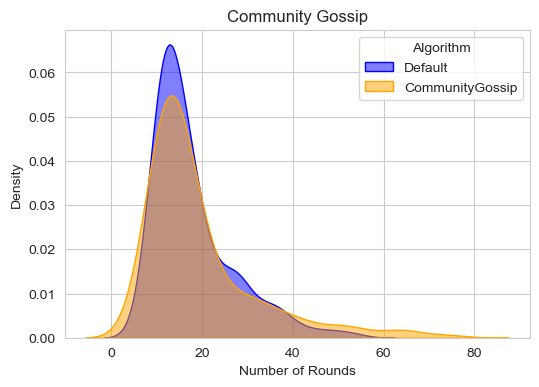

In [12]:

# Create a new plot for each rounded modularity combination
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_default, x='numRounds', label='Default', color='blue', fill=True, alpha=0.5)
sns.kdeplot(data=df_community_gossip, x='numRounds', label='CommunityGossip', color='orange', fill=True, alpha=0.5)

plt.xlabel('Number of Rounds')
plt.ylabel('Density')
plt.title(f'Community Gossip')
plt.legend(title='Algorithm')

# Show the plot
plt.show()

In [13]:
df_default_mean = df_default['numRounds'].mean()
df_default_mean

17.81875

In [14]:
weighted_factor_mean = dataframe[dataframe['algorithm'] == 'weighted_factor'].groupby('factor')['numRounds'].mean()
weighted_factor_mean

factor
1.25    16.88750
1.50    17.16250
1.75    16.91875
2.00    16.80000
2.25    16.46875
2.50    16.13750
2.75    15.79375
3.00    16.27500
Name: numRounds, dtype: float64

In [15]:
df_community_probabilities_mean = df_community_probabilities['numRounds'].mean()
df_community_probabilities_mean

13.59375

In [16]:
df_community_gossip_mean = df_community_gossip['numRounds'].mean()
df_community_gossip_mean

19.375

In [18]:
algorithm_means = {}
wf_275_mean = weighted_factor_mean.loc[2.75]
algorithm_means['wf_2.75'] = wf_275_mean

algorithm_means['comm_prob'] = df_community_probabilities_mean

algorithm_means['comm_goss'] = df_community_gossip_mean


algorithm_means

{'wf_2.75': 15.79375, 'comm_prob': 13.59375, 'comm_goss': 19.375}

In [19]:
# Create a DataFrame from the dictionary
df_algorithm_means = pd.DataFrame.from_dict(algorithm_means, orient='index', columns=['numRounds'])
df_algorithm_means.index.name = 'algorithm'

df_algorithm_means

,numRounds
algorithm,
wf_2.75,15.79375
comm_prob,13.59375
comm_goss,19.37500


In [20]:
default_series = pd.Series(df_default_mean, index=['default'])
default_series.index.name = 'algorithm'
default_data = default_series.to_frame(name='numRounds')
default_data

,numRounds
algorithm,
default,17.81875


In [21]:
algorithm_means = pd.concat([default_data, df_algorithm_means])
algorithm_means

,numRounds
algorithm,
default,17.81875
wf_2.75,15.79375
comm_prob,13.59375
comm_goss,19.37500


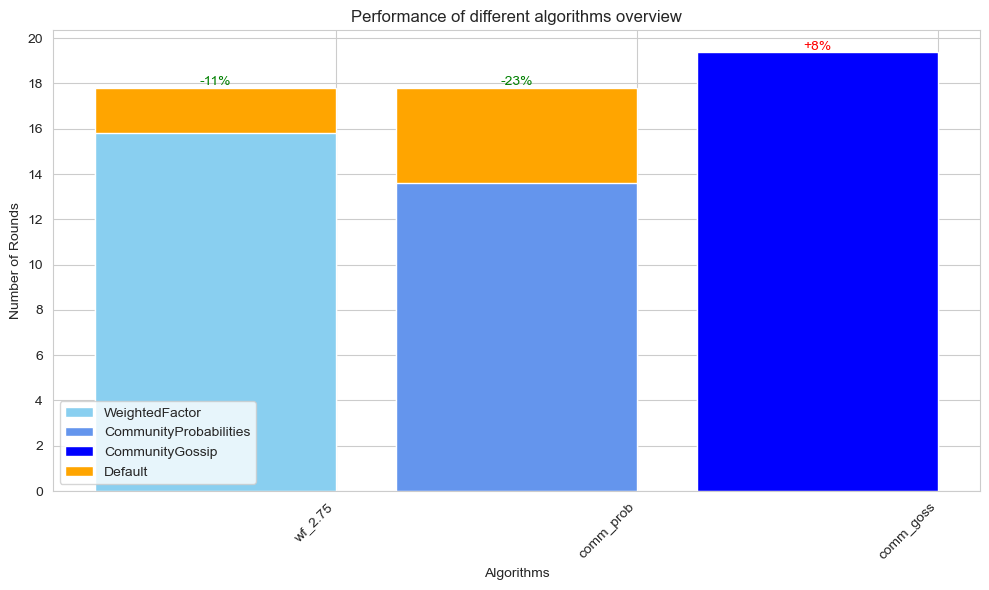

In [23]:
index = algorithm_means.index
numRounds = algorithm_means.numRounds

def plot_performance(index, numRounds, title_addition, show_legend):
    plt.figure(figsize=(10, 6))  # Adjusted figure size

    # Adjust the width of the bars here
    bar_width = 0.8  # Decreased width for spacing

    # Create two sets of bars
    bars2 = plt.bar([i for i in range(1, len(index))], [numRounds[0]] * (len(index) - 1), width=bar_width, color='orange')  # Adjusted x positions for the second set of bars
    bars1 = plt.bar(range(1, len(index)), numRounds[1:], width=bar_width, color='blue')  # Leaving out the first value

    # Different colors for first and second bar
    first_bar = bars1[0]
    first_bar.set_facecolor('#89CFF0')
    second_bar = bars1[1]
    second_bar.set_facecolor('#6495ED')

    plt.xlabel('Algorithms')
    plt.ylabel('Number of Rounds')
    plt.title('Performance of different algorithms ' + title_addition)

    # Adding % decrease labels on top of the original bars
    for i, bar in enumerate(bars2):
        percent_change = ((numRounds[i + 1] - numRounds[0]) / numRounds[0]) * 100
        if percent_change > 0:
            plt.text(bars1[i].get_x() + bars1[i].get_width() / 2, bars1[i].get_height() + 0.1, f'+{int(percent_change)}%', ha='center', color='red')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{int(percent_change)}%', ha='center', color='green')

    # Adjust y-axis tick values and spacing
    max_num_rounds = int(max(numRounds))
    plt.yticks(range(0, max_num_rounds + 2, 2))

    # Create custom legend in the bottom left corner
    if show_legend:
        plt.legend([bars1[0], bars1[1], bars1[2], bars2[0]], ['WeightedFactor', 'CommunityProbabilities', 'CommunityGossip', 'Default'], loc='lower left')

    # Adjust x-axis ticks and labels
    plt.xticks([i + bar_width / 2 for i in range(1, len(index))], index[1:], rotation=45, ha='right')  # Rotated x labels for better readability

    plt.tight_layout()  # Ensures labels fit within the plot area
    plt.show()

plot_performance(index, numRounds, 'overview', True)

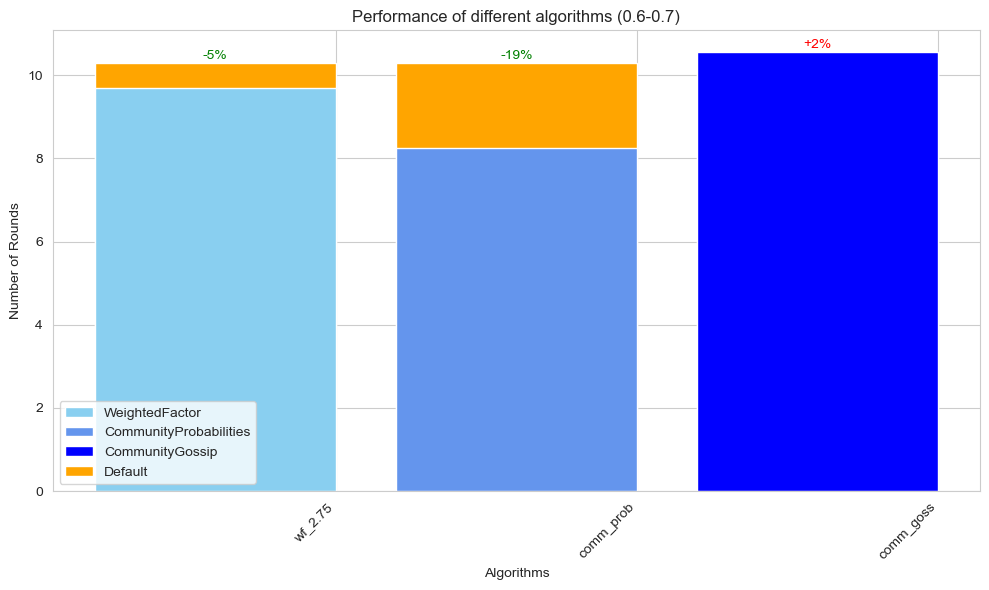

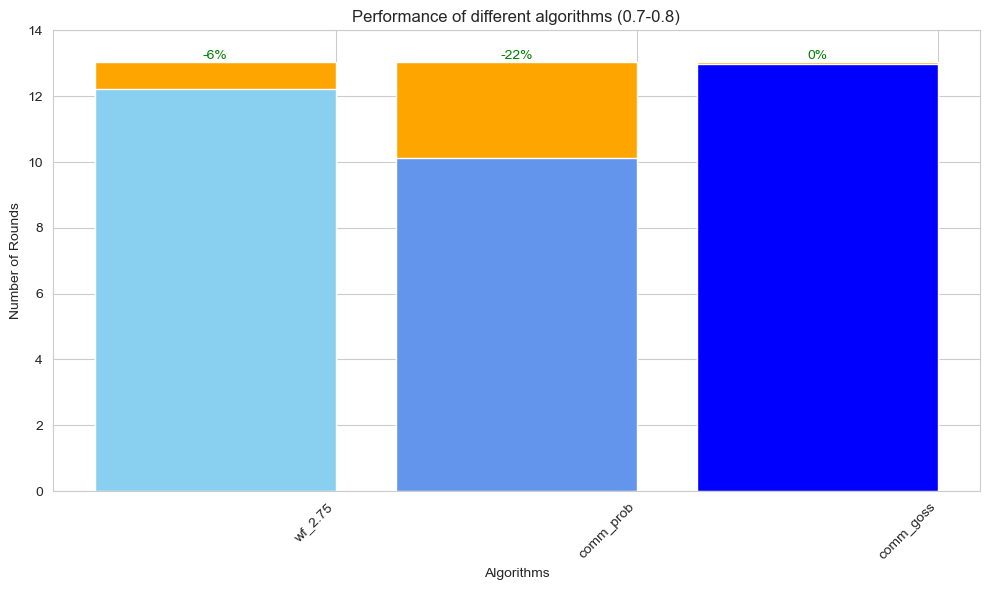

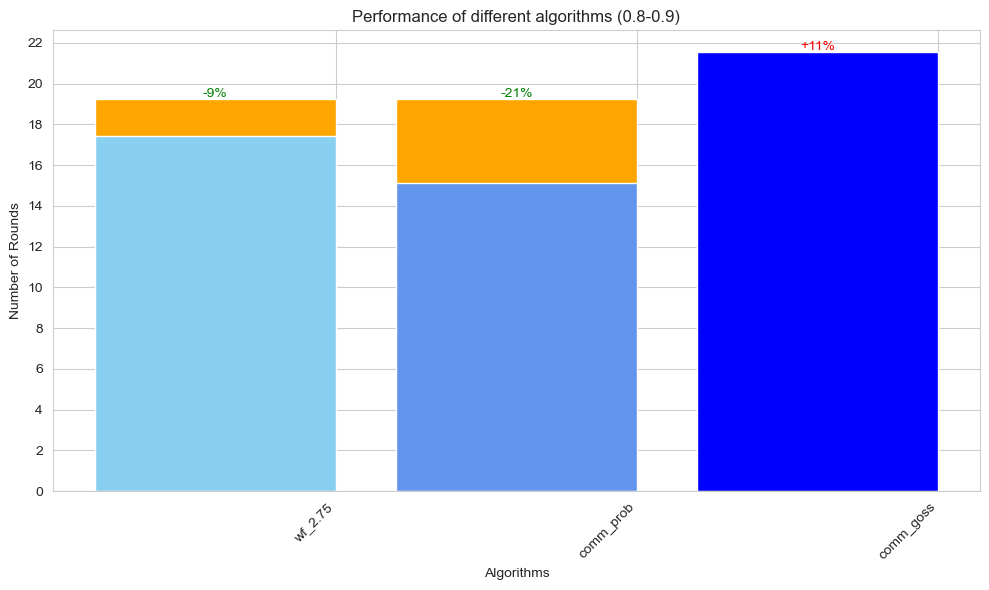

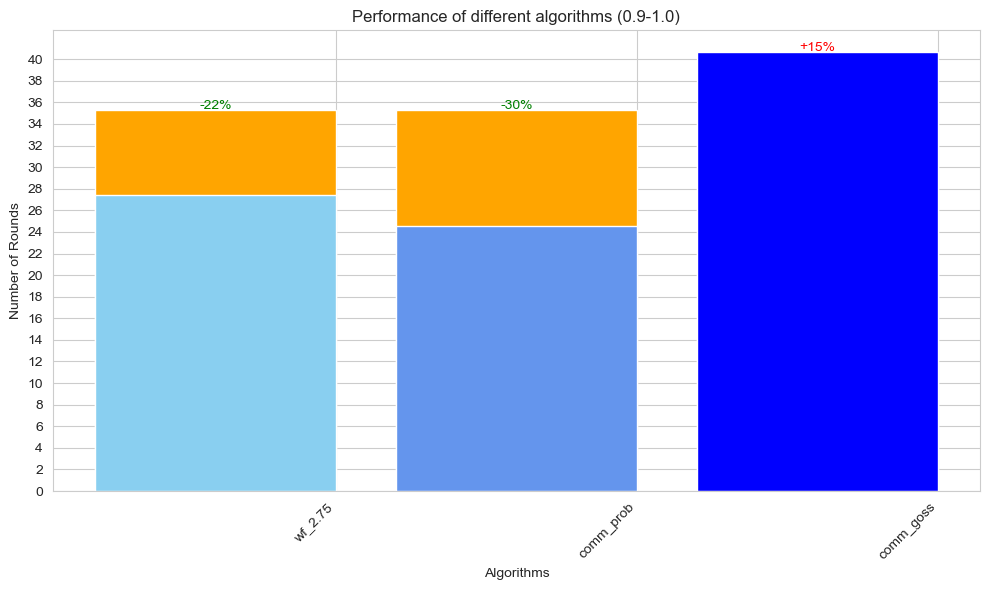

In [25]:
# Create a list of modularity value ranges in 0.1 steps
modularity_ranges = [(round(x, 1), round(x + 0.1, 1)) for x in [i / 10 for i in range(5, 10)]]
show = True
for mod_range in modularity_ranges:
    min_modularity, max_modularity = mod_range

    filtered_data = dataframe[
        (dataframe['modularity'] >= min_modularity) & (dataframe['modularity'] < max_modularity)
    ]

    if len(filtered_data) == 0:
        continue

    df_wf_275 = filtered_data[filtered_data['factor'] == 2.75]

    df_community_probabilities = filtered_data[filtered_data['algorithm'] == 'community_probabilities']

    df_default = filtered_data[filtered_data['algorithm'] == 'default']

    df_community_gossip = filtered_data[filtered_data['algorithm'] == 'community_based']

    # Dictionary to store the computed means
    algorithm_means = {}

    df_wf_275_mean = df_wf_275['numRounds'].mean()
    df_community_probabilities_mean = df_community_probabilities['numRounds'].mean()
    df_default_mean = df_default['numRounds'].mean()
    df_community_gossip_mean = df_community_gossip['numRounds'].mean()

    algorithm_means['default'] = df_default_mean
    algorithm_means['wf_2.75'] = df_wf_275_mean
    algorithm_means['comm_prob'] = df_community_probabilities_mean
    algorithm_means['comm_goss'] = df_community_gossip_mean

    # Create a DataFrame from the dictionary
    algorithm_means = pd.DataFrame.from_dict(algorithm_means, orient='index', columns=['numRounds'])
    algorithm_means.index.name = 'algorithm'

    index = algorithm_means.index
    numRounds = algorithm_means.numRounds

    plot_performance(index, numRounds, f'({min_modularity}-{max_modularity})', show)
    show = False

In [26]:
def print_performance_difference(df1, df2, text1, text2):
    # Calculate the total number of rounds for the two dataframes
    total_rounds_df1 = df1['numRounds'].sum()
    total_rounds_df2 = df2['numRounds'].sum()

    # Calculate the percentage change
    percentage_change = ((total_rounds_df1 - total_rounds_df2) / total_rounds_df2) * 100

    print(f"The {text1} algorithm is {abs(percentage_change):.2f}% {'faster' if percentage_change < 0 else 'slower'} than the {text2} algorithm.")